# 資料前處理

In [ ]:
!pip install tensorflow==2.11.0

In [ ]:
!pip install git+https://github.com/VenkateshwaranB/stellargraph.git

  Cloning https://github.com/VenkateshwaranB/stellargraph.git to /tmp/pip-req-build-29xo76bj
  Running command git clone --filter=blob:none --quiet https://github.com/VenkateshwaranB/stellargraph.git /tmp/pip-req-build-29xo76bj
  Resolved https://github.com/VenkateshwaranB/stellargraph.git to commit efa1f847109a4ba490e7a5105646a20ee09a3243
  Preparing metadata (setup.py) ... done
  Created wheel for stellargraph: filename=stellargraph-1.3.0b0-py3-none-any.whl size=431845 sha256=b8a14cc10ecede23c96401d042efb88077873cc91040d3e9165e18395a33775a
  Stored in directory: /tmp/pip-ephem-wheel-cache-frad1rl9/wheels/f3/06/0f/089f69af27d308a1830638f855b6c5755311d8ffc451de9980
Successfully built stellargraph


In [ ]:
!pip install stellargraph

In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 從google文件讀取csv檔的數據
from google.colab import drive
drive.mount("/content/drive")

# 讀取兩個 CSV 檔案
data = pd.read_csv("/content/drive/My Drive/時空資料分析/期末報告/資料/備用/加州高速公路/PeMSD7_V_228.csv", header=None).values
adj = pd.read_csv("/content/drive/My Drive/時空資料分析/期末報告/資料/備用/加州高速公路/PeMSD7_W_228.csv", header=None).values
station = pd.read_csv("/content/drive/My Drive/時空資料分析/期末報告/資料/備用/加州高速公路/PeMSD7_M_Station_Info(站點經緯度).csv")

# 確保數據為 DataFrame 格式
if not isinstance(data, pd.DataFrame):
    data = pd.DataFrame(data)

# 創建新的欄位名稱 1-228
column_names = [str(i) for i in range(0, 228)]

# 新增欄位名稱到 DataFrame
data.columns = column_names

# 顯示前幾行數據以驗證欄位名稱的新增
print(data.head())
print(data.columns.tolist())

Mounted at /content/drive
      0     1     2     3     4     5     6     7     8     9  ...   218  \
0  71.1  66.0  64.6  65.6  67.1  71.9  68.6  67.7  65.8  40.9  ...  69.1   
1  68.1  66.8  61.7  66.7  64.5  71.6  72.3  64.9  65.6  40.1  ...  70.6   
2  68.0  64.3  66.6  68.7  68.1  70.5  70.2  61.7  63.4  39.6  ...  72.2   
3  68.3  67.8  65.9  66.6  67.9  70.3  69.8  67.6  63.2  37.6  ...  71.2   
4  68.9  69.5  61.2  67.4  64.0  68.1  67.0  66.7  64.2  36.8  ...  71.3   

    219   220   221   222   223   224   225   226   227  
0  70.9  65.0  64.5  66.6  66.6  65.0  69.3  67.7  68.9  
1  65.4  65.0  64.9  65.1  67.7  65.0  67.7  68.8  68.8  
2  70.5  65.0  64.7  66.7  68.9  65.0  70.2  69.1  68.7  
3  69.7  65.0  65.2  67.2  66.9  65.0  70.4  67.3  69.0  
4  65.8  65.0  66.3  66.7  66.2  65.0  68.0  67.4  68.1  

[5 rows x 228 columns]
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25'

In [ ]:
# 檢查整個 DataFrame 是否存在缺失值
has_missing_values = data.isnull().any().any()
print(f"DataFrame has missing values: {has_missing_values}")

DataFrame has missing values: False


In [ ]:
#只保留其中一個方向的資料
station_n = station.iloc[16:51,:]
station_n = station_n[station_n['Dir']=='N']
# 從 df_info 中提取需要的欄位名稱
columns_to_keep = station_n['Unnamed: 0'].astype(str).tolist()

# 過濾 df_data，只保留需要的欄位
filtered_df_data = data[columns_to_keep]

filtered_df_data = filtered_df_data[['17', '19', '27', '38', '43', '44']]

data = filtered_df_data

# 印出結果
print(filtered_df_data)

         17    19    27    38    43    44
0      64.2  70.5  65.0  68.7  65.0  65.0
1      65.8  72.3  65.1  67.3  65.0  65.5
2      68.1  71.8  65.1  67.8  65.0  64.1
3      65.6  71.5  65.1  68.4  65.2  64.6
4      62.7  69.0  65.0  67.7  65.1  65.1
...     ...   ...   ...   ...   ...   ...
12667  66.4  70.1  64.7  65.9  64.9  64.0
12668  65.7  70.5  65.0  67.5  64.8  63.5
12669  65.8  70.8  64.6  68.7  64.8  64.2
12670  63.0  68.3  64.8  67.5  65.2  61.1
12671  66.6  70.1  64.9  68.2  65.2  64.2

[12672 rows x 6 columns]


In [ ]:
sub_adj = adj[16:51, 16:51]

# 要刪除的行和列索引
rows_to_delete = [0,2,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,23,24,25,26,29,30,31,32,33,34]
cols_to_delete = [0,2,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,23,24,25,26,29,30,31,32,33,34]

# 刪除指定的行
adj_matrix = np.delete(sub_adj, rows_to_delete, axis=0)

# 刪除指定的列
adj_matrix = np.delete(adj_matrix, cols_to_delete, axis=1)
print(sub_adj)
print(sub_adj.shape)
sub_adj = adj_matrix
# 印出結果
print(adj_matrix)
print(adj_matrix.shape)

[[    0.     949.83 12872.61 ... 13796.16 19263.08  3903.19]
 [  949.83     0.   11923.77 ... 12848.76 18339.94  2954.28]
 [12872.61 11923.77     0.   ...   982.02  7035.95  8988.26]
 ...
 [13796.16 12848.76   982.02 ...     0.    6071.25  9924.15]
 [19263.08 18339.94  7035.95 ...  6071.25     0.   15535.86]
 [ 3903.19  2954.28  8988.26 ...  9924.15 15535.86     0.  ]]
(35, 35)
[[   0.   2960.94 2670.3  3514.16 2960.94 1211.35]
 [2960.94    0.    298.27  562.92    0.   1816.28]
 [2670.3   298.27    0.    861.17  298.27 1518.36]
 [3514.16  562.92  861.17    0.    562.92 2378.99]
 [2960.94    0.    298.27  562.92    0.   1816.28]
 [1211.35 1816.28 1518.36 2378.99 1816.28    0.  ]]
(6, 6)


重新採樣(5分鐘->20分鐘)

In [ ]:
# 將數據轉換為DataFrame
df = pd.DataFrame(data)

# 創建包含所有日期和時間的時間序列（5分鐘間隔）
date_range = pd.date_range(start='2012-05-01', end='2012-06-30', freq='5T')

# 過濾掉假日（星期六和星期天）
date_range = date_range[~date_range.to_series().dt.dayofweek.isin([5, 6])]

# 確保時間序列的長度與數據行數一致
date_range = date_range[:len(df)]

# 將時間序列設置為索引
df['timestamp'] = date_range
df.set_index('timestamp', inplace=True)

# 重採樣為20分鐘間隔，並計算平均值
df_resampled = df.resample('20T').mean()

# 保留小數點後一位
df_resampled = df_resampled.round(1)

# 重置索引以便查看結果
df_resampled.reset_index(inplace=True)

# 刪除timestamp列
df_resampled.drop(columns=['timestamp'], inplace=True)

# 找出包含缺失值的行
missing_values = df_resampled.isnull().any(axis=1)
missing_indices = missing_values[missing_values].index
print("\n包含缺失值的行：")
print(missing_indices)

# 刪除包含缺失值的行
df_cleaned = df_resampled.dropna()

data = df_cleaned

print("\n刪除包含缺失值的行後的資料框：")
print(df_cleaned)



包含缺失值的行：
Index([ 288,  289,  290,  291,  292,  293,  294,  295,  296,  297,
       ...
       3950, 3951, 3952, 3953, 3954, 3955, 3956, 3957, 3958, 3959],
      dtype='int64', length=1152)

刪除包含缺失值的行後的資料框：
        17    19    27    38    43    44
0     65.9  71.5  65.1  68.0  65.0  64.8
1     63.0  69.0  65.0  67.7  65.0  63.5
2     63.7  69.0  64.8  67.0  65.1  64.2
3     63.0  69.6  64.8  67.4  65.0  64.6
4     63.5  68.8  64.8  67.4  65.1  64.0
...    ...   ...   ...   ...   ...   ...
4315  64.2  68.9  64.0  65.8  64.1  62.6
4316  64.8  70.8  64.4  68.0  64.8  64.2
4317  65.1  69.0  64.2  67.4  64.5  63.1
4318  64.5  69.0  64.4  66.5  64.6  63.4
4319  65.3  69.9  64.8  68.0  65.0  63.2

[3168 rows x 6 columns]


去除雜訊

In [ ]:
#高斯濾波器
from scipy.ndimage import gaussian_filter1d

def apply_gaussian_filter(data, sigma):
    return gaussian_filter1d(data, sigma=sigma)

sigma = 5
smoothed = data.apply(lambda x: apply_gaussian_filter(x, sigma), axis=0)

data = smoothed

In [ ]:
# 檢查整個 DataFrame 是否存在缺失值
has_missing_values = data.isnull().any().any()
print(f"DataFrame has missing values: {has_missing_values}")

DataFrame has missing values: False


In [ ]:
import numpy as np

# 假設 trainX 是你的數據
missing_positions = np.where(np.isnan(data))
print("缺失值的位置 (行, 列):", list(zip(missing_positions[0], missing_positions[1])))


缺失值的位置 (行, 列): []


處理異常值

In [ ]:
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
# 計算 Z-Score
z_scores = zscore(data, axis=1)

# 設定 Z-Score 閾值，通常使用 3 或 -3 作為判斷異常的閾值
threshold = 3
anomalies_zscore = (np.abs(z_scores) > threshold)

# 顯示異常值的位置
anomalies_zscore_indices = np.where(anomalies_zscore)
print("Z-Score 異常值位置:", anomalies_zscore_indices)

Z-Score 異常值位置: (array([], dtype=int64), array([], dtype=int64))


In [ ]:
speed_data_moving_avg = data.copy()
for row, col in zip(anomalies_zscore_indices[0], anomalies_zscore_indices[1]):
    if col > 0 and col < data.shape[1] - 1:
        speed_data_moving_avg.iloc[row, col] = (
            data.iloc[row, col-1] + data.iloc[row, col+1]) / 2
    elif col == 0:
        speed_data_moving_avg.iloc[row, col] = data.iloc[row, col+1]
    else:
        speed_data_moving_avg.iloc[row, col] = data.iloc[row, col-1]
print("移動平均值替換異常值後的數據:", speed_data_moving_avg)
data = speed_data_moving_avg

移動平均值替換異常值後的數據:          17    19    27    38    43    44
0      64.2  70.5  65.0  68.7  65.0  65.0
1      65.8  72.3  65.1  67.3  65.0  65.5
2      68.1  71.8  65.1  67.8  65.0  64.1
3      65.6  71.5  65.1  68.4  65.2  64.6
4      62.7  69.0  65.0  67.7  65.1  65.1
...     ...   ...   ...   ...   ...   ...
12667  66.4  70.1  64.7  65.9  64.9  64.0
12668  65.7  70.5  65.0  67.5  64.8  63.5
12669  65.8  70.8  64.6  68.7  64.8  64.2
12670  63.0  68.3  64.8  67.5  65.2  61.1
12671  66.6  70.1  64.9  68.2  65.2  64.2

[12672 rows x 6 columns]


In [ ]:
import os
import sys
import urllib.request

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 讀取兩個 CSV 檔案
speed_data = data
sensor_dist_adj = sub_adj

# 使用transpose()方法將行和列互換
speed_data = speed_data.transpose()

# 確保鄰接矩陣是方形矩陣
num_nodes = sensor_dist_adj.shape[0]
assert sensor_dist_adj.shape == (num_nodes, num_nodes), "鄰接矩陣必須是方形矩陣"

num_nodes, time_len = speed_data.shape
print("No. of sensors:", num_nodes, "\nNo of timesteps:", time_len)

No. of sensors: 6 
No of timesteps: 3168


In [ ]:
print(data.shape)
print(sensor_dist_adj.shape)

(3168, 6)
(6, 6)


In [ ]:
speed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,4310,4311,4312,4313,4314,4315,4316,4317,4318,4319
17,63.665674,63.650055,63.620855,63.581264,63.535144,63.485327,63.432387,63.374020,63.304461,63.214875,...,62.101355,62.699780,63.177603,63.551606,63.839929,64.059373,64.223081,64.340268,64.416223,64.453610
19,69.407967,69.393176,69.366657,69.333851,69.301414,69.275534,69.260113,69.255558,69.257527,69.257024,...,67.598001,68.070844,68.464448,68.783400,69.034369,69.225405,69.365022,69.461328,69.521213,69.549805
27,64.851510,64.849418,64.845827,64.841803,64.838756,64.837930,64.840233,64.845901,64.854364,64.864234,...,60.414714,61.212484,61.903446,62.485330,62.960944,63.337124,63.622676,63.826858,63.957814,64.021656
38,67.586998,67.576384,67.554439,67.519928,67.471375,67.407258,67.326213,67.227381,67.110247,66.974623,...,64.275947,64.928901,65.494007,65.962626,66.335460,66.620104,66.827919,66.970793,67.059279,67.101384
43,64.871651,64.865572,64.854341,64.839683,64.823887,64.809317,64.798102,64.791692,64.790582,64.794230,...,60.865093,61.599681,62.241102,62.784861,63.231871,63.587191,63.858117,64.052589,64.177727,64.238869


# 可視化資料

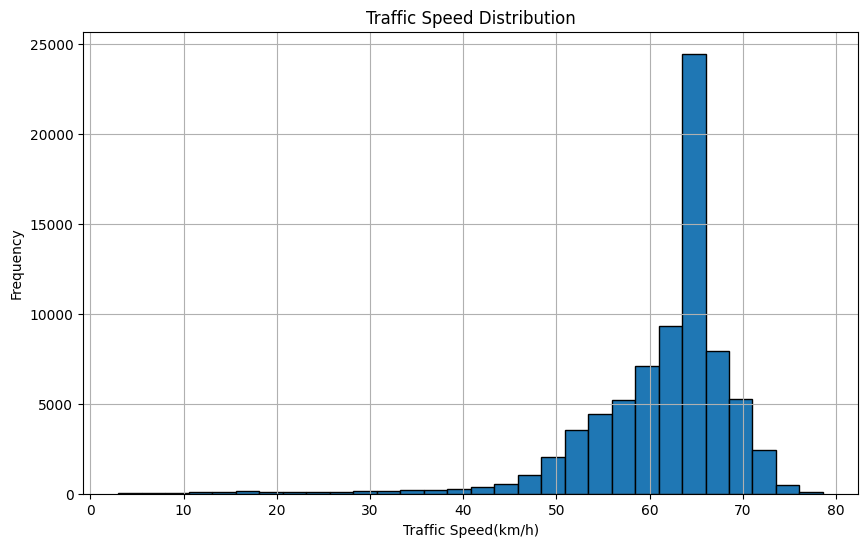

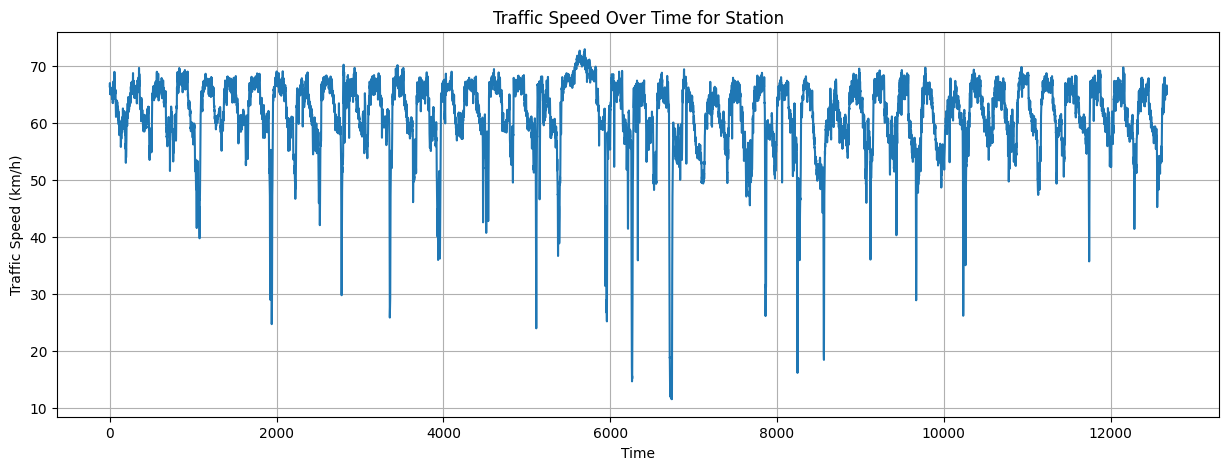

In [ ]:
df = pd.DataFrame(data)

# 將所有站點的車速數據合併起來
all_speeds = df.values.flatten()

# 繪製直方圖
plt.figure(figsize=(10, 6))
plt.hist(all_speeds, bins=30, edgecolor='k')
plt.title('Traffic Speed Distribution')
plt.xlabel('Traffic Speed(km/h)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 計算所有站點的平均車速
average_speeds = df.mean(axis=1)

# 生成折線圖
plt.figure(figsize=(15, 5))
plt.plot(df.index, average_speeds)
plt.title('Traffic Speed Over Time for Station')
plt.xlabel('Time')
plt.ylabel('Traffic Speed (km/h)')
plt.grid(True)
plt.show()

車流量時間序列圖：展示特定站點的車流量隨時間變化的趨勢圖。

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.tseries.offsets import BDay

# 生成工作日的每 5 分鐘時間戳
start_date = '2012-05-01'
end_date = '2012-06-30'

# 生成所有的工作日
business_days = pd.date_range(start=start_date, end=end_date, freq=BDay())

# 將每個工作日展開成每 5 分鐘一筆資料
time_index = []
for day in business_days:
    day_times = pd.date_range(start=day, end=day + pd.Timedelta(days=1) - pd.Timedelta(minutes=5), freq='5T')
    time_index.extend(day_times)

# 確認時間戳數量是否與數據行數相匹配
assert len(time_index) == len(data), "時間戳數量與數據行數不匹配"

# 將生成的時間戳分配給數據
data.index = time_index

# 選擇特定站點的車流量數據
station_id = '17'  # 替換為實際的站點ID
flow_data = data[station_id]

# 繪製車流量時間序列圖
plt.figure(figsize=(15, 5))
plt.plot(data.index, flow_data)
plt.xlabel('Time')
plt.ylabel('Traffic Speed')
plt.title(f'Traffic Speed Over Time for Station {station_id}')
plt.show()


AssertionError: 時間戳數量與數據行數不匹配

車流量分佈直方圖：展示車流量數據的分佈情況。

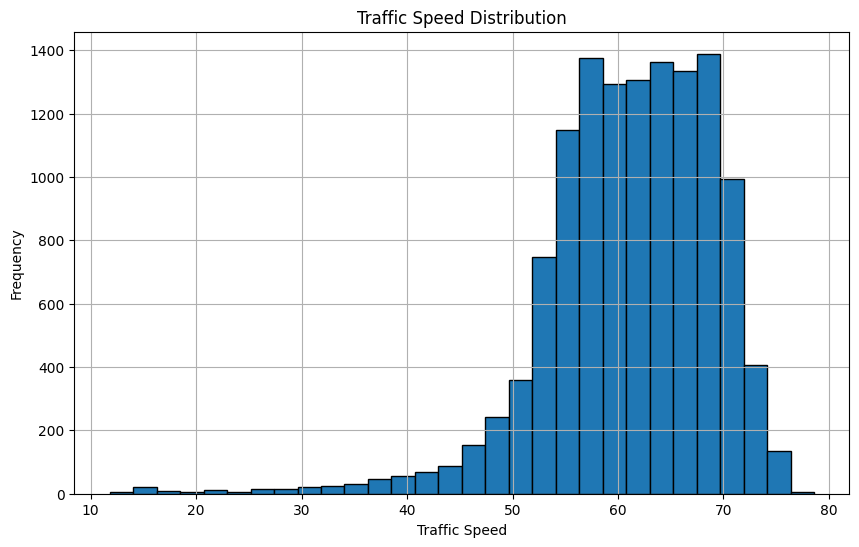

In [ ]:
# 繪製直方圖
plt.figure(figsize=(10, 6))
plt.hist(flow_data, bins=30, edgecolor='k')
plt.title('Traffic Speed Distribution')
plt.xlabel('Traffic Speed')
plt.ylabel('Frequency')
plt.grid(True)SS
plt.show()

車流量箱形圖：展示不同時間段（如高峰期和平峰期）車流量的分佈和異常值

<Figure size 1200x800 with 0 Axes>

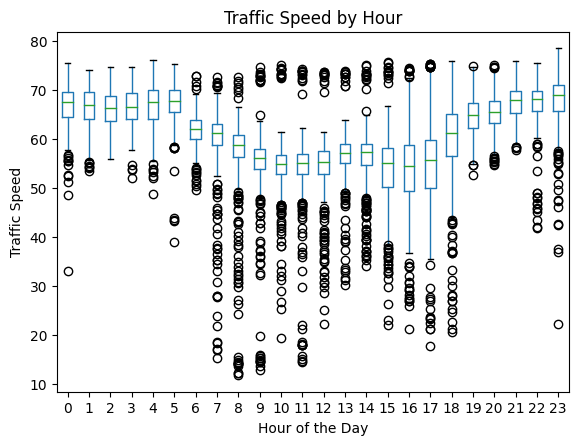

In [ ]:
# 添加小時列
data['hour'] = data.index.hour

# 繪製箱形圖
plt.figure(figsize=(12, 8))
data.boxplot(column=station_id, by='hour', grid=False)
plt.title('Traffic Speed by Hour')
plt.suptitle('')  # 移除預設的標題
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Speed')
plt.show()


In [ ]:
# 添加小時列
data['hour'] = data.index.hour

# 繪製箱形圖
plt.figure(figsize=(12, 8))
data.boxplot(column=station_id, by='hour', grid=False)
plt.title('Traffic Speed by Hour')
plt.suptitle('')  # 移除預設的標題
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Speed')
plt.show()


繪製所有站點位置

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假設 station_info 是您從某處獲得的 DataFrame
# station_info 應包含每個站點的 ID, 緯度(lat), 經度(lon) 和所屬高速公路(Fwy)

# 提取站點ID和經緯度
station_info = station[['ID', 'Latitude', 'Longitude', 'Fwy']]
station_info.columns = ['ID', 'lat', 'lon', 'Fwy']

plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

# 設置全局字體大小
plt.rc('font', size=12)  # 更改這裡的數值來調整字體大小
plt.rc('axes', titlesize=14)  # 設置軸標題的字體大小
plt.rc('axes', labelsize=12)  # 設置軸標籤的字體大小
plt.rc('legend', fontsize=12)  # 設置圖例的字體大小

# 建立固定的顏色映射，确保每個 Fwy 都使用同一顏色
unique_fwys = sorted(station_info['Fwy'].unique())
colors = sns.color_palette("hsv", len(unique_fwys))
fwy_to_color = {fwy: colors[idx] for idx, fwy in enumerate(unique_fwys)}

# 添加路段的文字標籤
for fwy in unique_fwys:
    fwy_data = station_info[station_info['Fwy'] == fwy]
    # 選擇中心點作為標籤的位置
    lon_label = fwy_data['lon'].mean()
    lat_label = fwy_data['lat'].mean()
    plt.text(lon_label, lat_label, f"Fwy {fwy}", fontsize=12, ha='center', va='center', color=fwy_to_color[fwy])

# 繪製站點位置
for idx, row in station_info.iterrows():
    color = fwy_to_color[row['Fwy']]
    plt.scatter(row['lon'], row['lat'], color=color)

plt.legend([f'Fwy {f}' for f in unique_fwys], title="Stations")
plt.title("Station Locations and Connections")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


繪製605路段位置

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# 提取站點ID和經緯度
station_info = station[station['Fwy'] == 605]
station_info = station_info[['ID', 'Latitude', 'Longitude']]
station_info.columns = ['ID', 'lat', 'lon']


# 確認列名是否一致，進行合併
#merged_data = pd.merge(data, station_info, left_on='station', right_on='station')
#print(merged_data.head())


plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

# 統一顏色
color = 'blue'

# 繪製站點位置
for idx, row in station_info.iterrows():
    plt.scatter(row['lon'], row['lat'], color=color)

# 添加標籤為 "605"
for idx, row in station_info.iterrows():
    plt.text(row['lon'], row['lat'], '605', fontsize=8)

plt.legend(["605"], title="Stations")
plt.title("Station Locations and Connections")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
# 數據標準化
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#data = scaler.fit_transform(data)

In [ ]:
print("列名: ", data.columns)

In [ ]:
# 選擇特定站點的車流量數據
station_id = '16'  # 替換為實際的站點ID
flow_data = data[station_id]

# 使用索引作為時間
time_index = data.index

# 繪製車流量時間序列圖
plt.figure(figsize=(15, 5))
plt.plot(time_index, flow_data)
plt.xlabel('Time Index')
plt.ylabel('Traffic Flow')
plt.title(f'Traffic Flow Over Time for Station {station_id}')
plt.show()

In [ ]:
data

,17,18,19,20,24,25,27,31,32,34,35,37,38,39,41,43,44,46,49,50
0,64.2,71.9,70.5,65.5,68.2,65.0,65.0,71.6,65.0,68.0,65.0,65.0,68.7,71.5,69.2,65.0,65.0,72.1,68.5,65.0
1,65.8,72.7,72.3,65.2,69.7,65.0,65.1,71.4,65.0,70.1,65.0,65.0,67.3,73.9,71.0,65.0,65.5,70.2,66.6,65.0
2,68.1,71.7,71.8,66.0,69.0,65.0,65.1,69.7,65.4,68.0,65.1,64.9,67.8,72.1,69.7,65.0,64.1,68.8,66.6,65.0
3,65.6,70.9,71.5,64.0,68.0,64.9,65.1,68.4,65.1,67.0,65.0,65.2,68.4,71.4,69.5,65.2,64.6,65.7,67.7,65.1
4,62.7,71.1,69.0,62.6,66.9,64.9,65.0,68.2,65.2,66.7,65.0,65.2,67.7,70.1,68.7,65.1,65.1,64.3,66.2,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12667,66.4,69.7,70.1,69.6,68.1,64.8,64.7,70.5,64.6,67.6,64.8,64.8,65.9,69.9,69.3,64.9,64.0,70.9,66.8,64.7
12668,65.7,68.2,70.5,71.8,65.5,64.9,65.0,70.4,64.8,67.8,64.9,65.0,67.5,70.1,67.4,64.8,63.5,73.3,67.2,64.7
12669,65.8,69.0,70.8,67.8,66.2,64.9,64.6,69.1,64.9,66.3,64.9,64.9,68.7,71.1,68.5,64.8,64.2,69.1,67.8,64.7
12670,63.0,68.6,68.3,68.9,66.9,64.9,64.8,68.9,64.5,67.5,65.0,65.0,67.5,70.9,68.0,65.2,61.1,71.1,67.8,64.9


# 分割資料集

In [ ]:
def train_test_split(data, train_portion):
    time_len = data.shape[1]
    train_size = int(time_len * train_portion)
    train_data = np.array(data.iloc[:, :train_size])
    test_data = np.array(data.iloc[:, train_size:])
    return train_data, test_data

train_rate = 0.8
train_data, test_data = train_test_split(speed_data, train_rate)
print("Train data: ", train_data.shape)
print("Test data: ", test_data.shape)

Train data:  (6, 2534)
Test data:  (6, 634)


In [ ]:
def scale_data(train_data, test_data):
    max_speed = train_data.max()
    min_speed = train_data.min()
    train_scaled = (train_data - min_speed) / (max_speed - min_speed)
    test_scaled = (test_data - min_speed) / (max_speed - min_speed)
    return train_scaled, test_scaled

train_scaled, test_scaled = scale_data(train_data, test_data)

# LSTM 的序列資料準備

得出鄰接矩陣

In [ ]:
def compute_adjacency_matrix(
    route_distances: np.ndarray, sigma2: float, epsilon: float
):
    """Computes the adjacency matrix from distances matrix.

    It uses the formula in https://github.com/VeritasYin/STGCN_IJCAI-18#data-preprocessing to
    compute an adjacency matrix from the distance matrix.
    The implementation follows that paper.

    Args:
        route_distances: np.ndarray of shape `(num_routes, num_routes)`. Entry `i,j` of this array is the
            distance between roads `i,j`.
        sigma2: Determines the width of the Gaussian kernel applied to the square distances matrix.
        epsilon: A threshold specifying if there is an edge between two nodes. Specifically, `A[i,j]=1`
            if `np.exp(-w2[i,j] / sigma2) >= epsilon` and `A[i,j]=0` otherwise, where `A` is the adjacency
            matrix and `w2=route_distances * route_distances`

    Returns:
        A boolean graph adjacency matrix.
    """
    num_routes = route_distances.shape[0]
    route_distances = route_distances / 10000.0
    w2, w_mask = (
        route_distances * route_distances,
        np.ones([num_routes, num_routes]) - np.identity(num_routes),
    )
    #return (np.exp(-w2 / sigma2) >= epsilon) * w_mask
    adjacency_matrix = (np.exp(-w2 / sigma2) >= epsilon) * w_mask

    # 檢查孤立點並手動添加連接
    row_sums = adjacency_matrix.sum(axis=1)
    col_sums = adjacency_matrix.sum(axis=0)
    isolated_nodes = np.where((row_sums == 0) & (col_sums == 0))[0]

    for node in isolated_nodes:
        nearest_node = np.argmin(route_distances[node])
        adjacency_matrix[node, nearest_node] = 1
        adjacency_matrix[nearest_node, node] = 1

    return adjacency_matrix

In [ ]:
#設定用於計算鄰接矩陣的兩個參數
sigma2 = 0.1
epsilon = 0.5

#計算鄰接矩陣，包括邊（由節點索引對組成的列表）和節點數量（由鄰接矩陣的形狀決定）
adjacency_matrix = compute_adjacency_matrix(sensor_dist_adj, sigma2, epsilon)
node_indices, neighbor_indices = np.where(adjacency_matrix == 1)
edges=(node_indices.tolist(), neighbor_indices.tolist())
num_nodes=adjacency_matrix.shape[0]

#輸出圖的節點數量和邊的數量
print(f"number of nodes: {num_nodes}, number of edges: {len(edges[0])}")

number of nodes: 6, number of edges: 22


In [ ]:
print(adjacency_matrix)
print(adjacency_matrix.shape)

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 1. 1. 1.]
 [0. 1. 0. 1. 1. 1.]
 [0. 1. 1. 0. 1. 1.]
 [0. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 0.]]
(6, 6)


In [ ]:
adjacency_matrix

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 1., 0., 1., 1., 1.],
       [0., 1., 1., 0., 1., 1.],
       [0., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 0.]])

In [ ]:
# 檢查每行和每列的總和是否為零
row_sums = adjacency_matrix.sum(axis=1)
col_sums = adjacency_matrix.sum(axis=0)

# 找出孤立的節點
isolated_nodes = np.where((row_sums == 0) & (col_sums == 0))[0]

print("孤立節點索引:", isolated_nodes)

孤立節點索引: []


In [ ]:
#每次訓練觀察都是 10 個歷史速度 ( seq_len)。
#每次訓練預測是60分鐘後的速度（pre_len）。
#seq_len = 10
#pre_len = 12
seq_len = 4
pre_len = 5

def sequence_data_preparation(seq_len, pre_len, train_data, test_data):
    trainX, trainY, testX, testY = [], [], [], []

    for i in range(train_data.shape[1] - int(seq_len + pre_len - 1)):
        a = train_data[:, i : i + seq_len + pre_len]
        trainX.append(a[:, :seq_len])
        trainY.append(a[:, -1])

    for i in range(test_data.shape[1] - int(seq_len + pre_len - 1)):
        b = test_data[:, i : i + seq_len + pre_len]
        testX.append(b[:, :seq_len])
        testY.append(b[:, -1])

    trainX = np.array(trainX)
    trainY = np.array(trainY)
    testX = np.array(testX)
    testY = np.array(testY)

    return trainX, trainY, testX, testY

In [ ]:
trainX, trainY, testX, testY = sequence_data_preparation(
    seq_len, pre_len, train_scaled, test_scaled
)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(2526, 6, 4)
(2526, 6)
(626, 6, 4)
(626, 6)


In [ ]:
# 檢查數據中是否有缺失值
print(np.isnan(trainX).any())
print(np.isnan(trainY).any())
print(np.isnan(testX).any())
print(np.isnan(testY).any())

# 檢查數據中是否有無窮大
print(np.isinf(trainX).any())
print(np.isinf(trainY).any())
print(np.isinf(testX).any())
print(np.isinf(testY).any())


False
False
False
False
False
False
False
False


# StellarGraph 圖卷積和 LSTM 模型

In [ ]:
from stellargraph.layer import GCN_LSTM
from tensorflow.keras.regularizers import l2

gcn_lstm = GCN_LSTM(
    seq_len=seq_len,
    #adj=sensor_dist_adj,
    adj=adjacency_matrix,
    gc_layer_sizes=[16, 16],  # 增加 GCN 層的節點數
    gc_activations=["relu", "relu"],
    lstm_layer_sizes=[256, 256],# 增加 LSTM 層的節點數256
    lstm_activations=["tanh", "tanh"],
    dropout=0.5,  # 減小 dropout
    kernel_regularizer=l2(0.0001),  # 增加 L2 正則化
    bias_regularizer=l2(0.0001),
)

x_input, x_output = gcn_lstm.in_out_tensors()
model = Model(inputs=x_input, outputs=x_output)
model.compile(optimizer="adam", loss="mae", metrics=["mae"])

history = model.fit(
    trainX,
    trainY,
    epochs=50,
    batch_size=64,
    shuffle=True,
    verbose=0,
    validation_data=[testX, testY],
)

<ipython-input-295-35d09c4f76ef>:4: ExperimentalWarning: GCN_LSTM is experimental: Lack of unit tests and code refinement (see: https://github.com/stellargraph/stellargraph/issues/1132, https://github.com/stellargraph/stellargraph/issues/1526, https://github.com/stellargraph/stellargraph/issues/1564). It may be difficult to use and may have major changes at any time.
  gcn_lstm = GCN_LSTM(


In [ ]:
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 6, 4)]            0         
                                                                 
 tf.expand_dims_12 (TFOpLamb  (None, 6, 4, 1)          0         
 da)                                                             
                                                                 
 reshape_36 (Reshape)        (None, 6, 4)              0         
                                                                 
 fixed_adjacency_graph_convo  (None, 6, 16)            106       
 lution_24 (FixedAdjacencyGr                                     
 aphConvolution)                                                 
                                                                 
 fixed_adjacency_graph_convo  (None, 6, 16)            298       
 lution_25 (FixedAdjacencyGr                              

In [ ]:
print(
    "Train loss: ",
    history.history["loss"][-1],
    "\nTest loss:",
    history.history["val_loss"][-1],
    "\nTrain mae:",
    history.history["mae"][-1],
    "\nTest mae:",
    history.history["val_mae"][-1],
)

Train loss:  0.04121290147304535 
Test loss: 0.0340457446873188 
Train mae: 0.03896310180425644 
Test mae: 0.031793899834156036


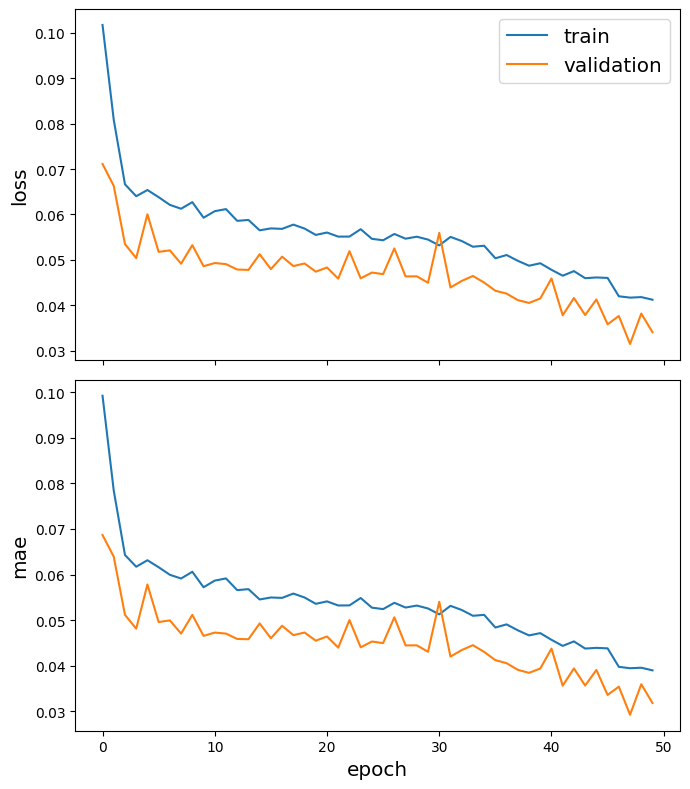

In [ ]:
import stellargraph as sg
sg.utils.plot_history(history)

# 重新調整值

In [ ]:
ythat = model.predict(trainX)
yhat = model.predict(testX)

20/20 [==============================] - 1s 63ms/step


In [ ]:
## Rescale values
max_speed = train_data.max()
min_speed = train_data.min()

## actual train and test values
train_original = np.array(trainY * max_speed)
test_original = np.array(testY * max_speed)
## Rescale model predicted values
train_preds = np.array((ythat) * max_speed)
test_preds = np.array((yhat) * max_speed)

# 衡量模型的性能

In [ ]:
"""Overall evaluatuation the predictions of the test data"""
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#因為MAPE是inf無限大，所以有改5/27
def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = np.finfo(np.float64).eps  # 添加一個非常小的數值以避免除以零
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
    return mape

print('RMSE: ', np.sqrt(mean_squared_error(test_original, test_preds)))
print('MAE: ', mean_absolute_error(test_original, test_preds))
print('MAPE: ', mean_absolute_percentage_error(test_original, test_preds))
print('MSE: ', mean_squared_error(test_original, test_preds))


RMSE:  3.415521012966208
MAE:  2.42582644332017
MAPE:  4.680861834734967
MSE:  11.665783790013712


分析路段間的關聯性
路段間車速關聯性分析：
利用 GCN 模型的輸出，分析不同路段之間的車速相互影響。

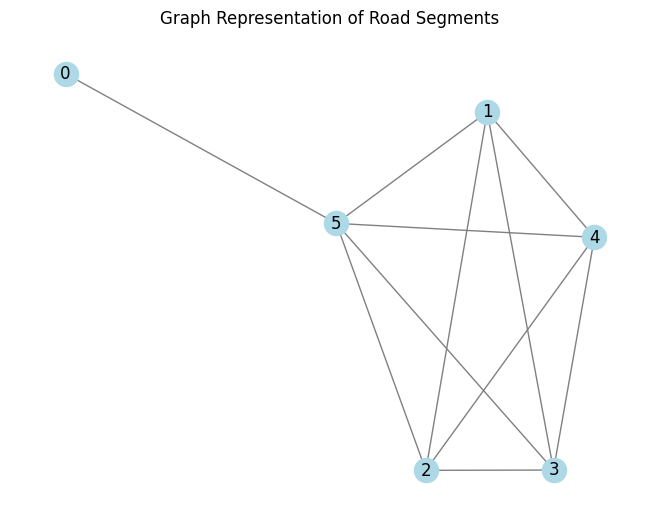

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_numpy_array(adjacency_matrix)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Graph Representation of Road Segments")
plt.show()


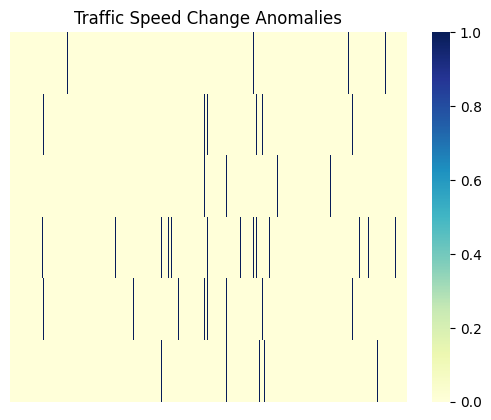

In [ ]:
import seaborn as sns

# 計算車速變化
speed_diff = np.diff(speed_data, axis=1)

# 使用 Z-Score 進行異常值檢測，檢測到的異常值可能代表交通事件或擁堵
z_scores_diff = zscore(speed_diff, axis=1)
anomalies_diff = (np.abs(z_scores_diff) > threshold)

# 繪製異常值熱力圖
sns.heatmap(anomalies_diff, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Traffic Speed Change Anomalies")
plt.show()


# 範例感測器上的實際速度和預測速度圖

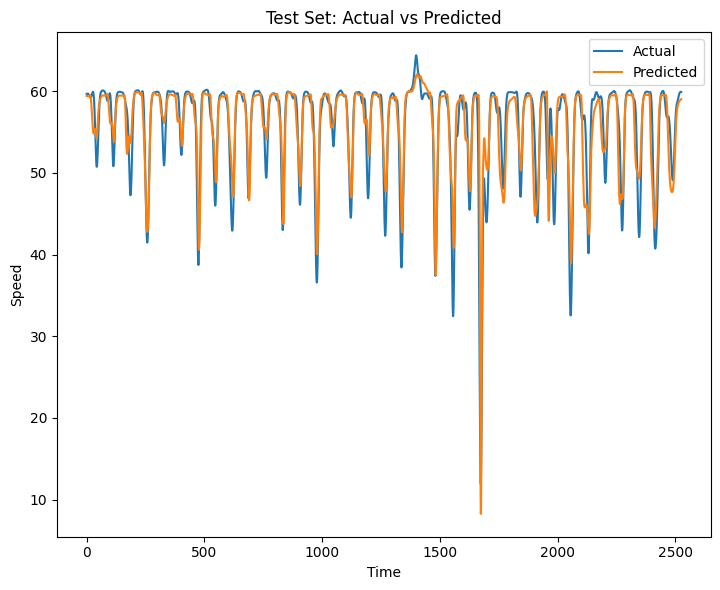

In [ ]:
# 預測結果與實際結果對比
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.plot(range(len(train_original[:, 4])), train_original[:, 4], label='Actual')
plt.plot(range(len(train_preds[:, 4])), train_preds[:, 4], label='Predicted')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.legend()

plt.tight_layout()
plt.show()

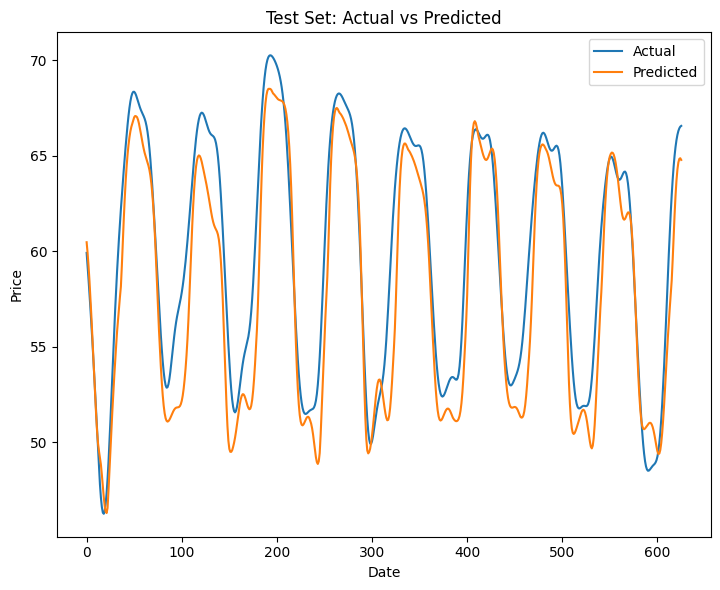

In [ ]:
# 預測結果與實際結果對比
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.plot(range(len(test_original[:, 1])), test_original[:, 1], label='Actual')
plt.plot(range(len(test_preds[:, 1])), test_preds[:, 1], label='Predicted')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

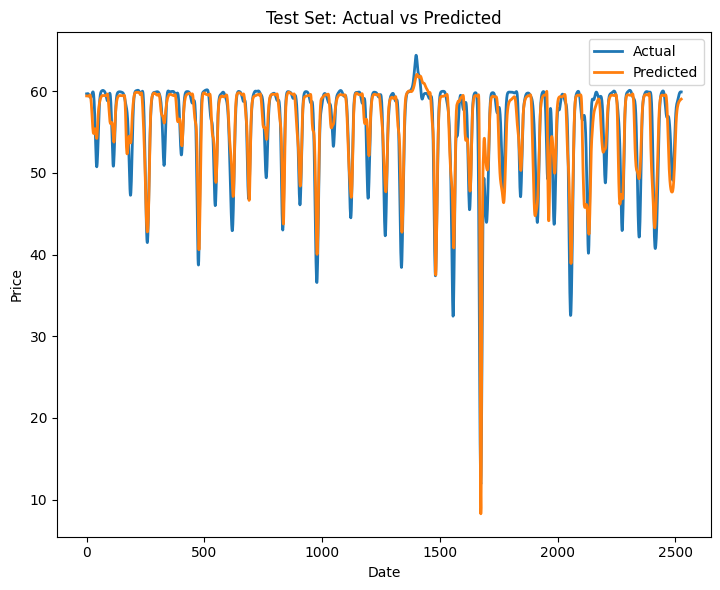

In [ ]:
# 預測結果與實際結果對比
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.plot(range(len(train_original[:, 4])), train_original[:, 4], label='Actual', linewidth=2)
plt.plot(range(len(train_preds[:, 4])), train_preds[:, 4], label='Predicted', linewidth=2)
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()


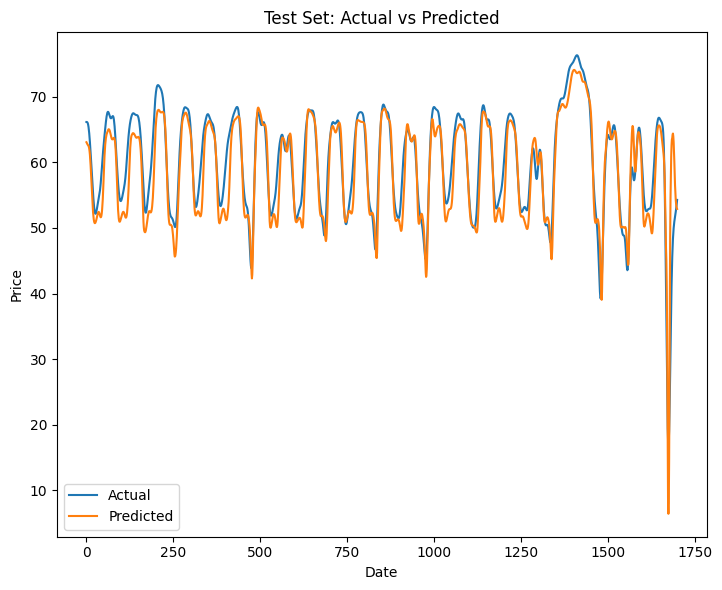

In [ ]:
# 預測結果與實際結果對比
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.plot(range(len(train_original[:1700, 1])), train_original[:1700, 1], label='Actual')
plt.plot(range(len(train_preds[:1700, 1])), train_preds[:1700, 1], label='Predicted')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print(test_original)
print(test_original.shape)

[[56.24692449 59.91388556 59.99276602 59.88250552 59.79526912 50.97720026]
 [55.54114159 59.24377305 59.93547026 59.34686169 59.7603939  50.22132649]
 [54.75333668 58.53051444 59.84821609 58.73056247 59.70369769 49.41193704]
 ...
 [59.03415492 66.42754246 58.29293281 62.8319017  58.6188256  57.49695426]
 [59.14381191 66.51400001 58.48199774 62.95965048 58.79949059 57.55662854]
 [59.19778928 66.55527905 58.57416663 63.02043912 58.88776193 57.58436612]]
(626, 6)


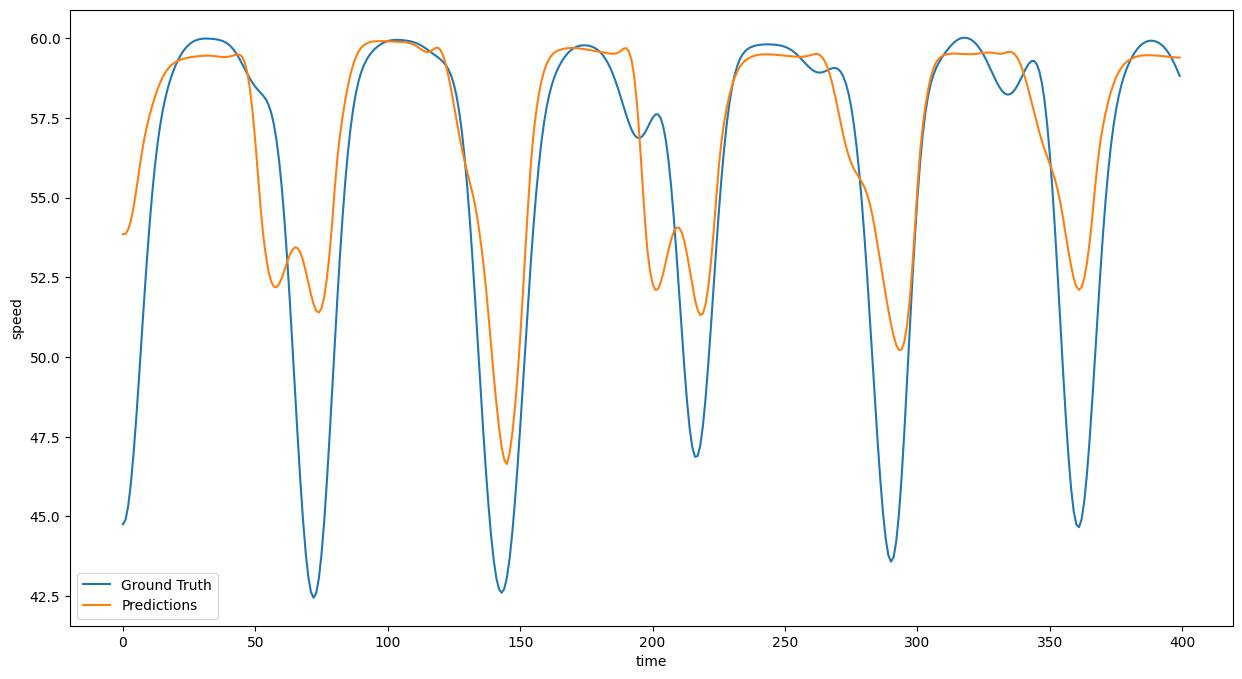

In [ ]:
##all test result visualization
fig1 = plt.figure(figsize=(15, 8))
#    ax1 = fig1.add_subplot(1,1,1)
#a_pred = test_preds[:, 100]
#a_true = test_original[:, 100]
plt.plot(range(len(test_original[100:500, 4])), test_original[100:500, 4], label='Ground Truth')
plt.plot(range(len(test_preds[100:500, 4])), test_preds[100:500, 4], label='Predictions')
#plt.plot(a_pred, "r-", label="prediction")
#plt.plot(a_true, "b-", label="true")
plt.xlabel("time")
plt.ylabel("speed")
plt.legend(loc="best", fontsize=10)
plt.show()

Adjusted future_steps to: 6
20/20 [==============================] - 1s 44ms/step
future_preds shape: (626, 6)


ValueError: x and y must have same first dimension, but have shapes (0,) and (6,)

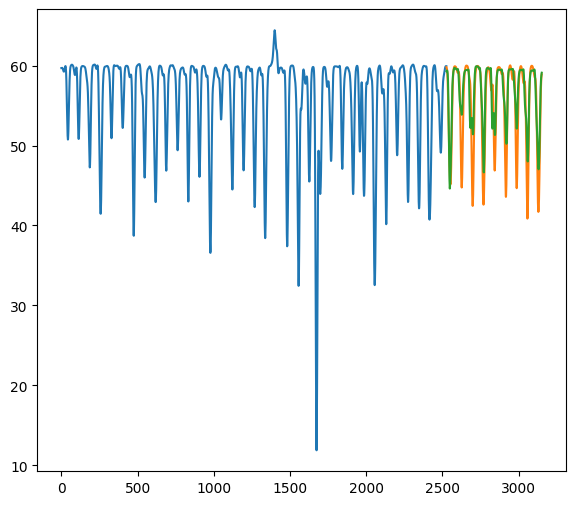

In [ ]:
# 定義未來預測的步數
future_steps = 1

# 檢查模型的輸出形狀

# 確保 future_steps 與模型的輸出匹配
if model.output_shape[1] != future_steps:
    future_steps = model.output_shape[1]
    print("Adjusted future_steps to:", future_steps)

# 使用模型進行未來預測
# 使用完整的測試數據進行預測
future_preds = model.predict(testX)

# 檢查 future_preds 的形狀
print("future_preds shape:", future_preds.shape)

# 將未來預測值反標準化
future_preds = np.array((future_preds) * max_speed)

# 繪製預測結果與實際結果對比圖，包括未來預測
def plot_predictions(test_original, test_preds, future_preds, train_original, train_preds, pre_len):
    plt.figure(figsize=(15, 6))
    future=future_preds[:5, 4]
    future_array = np.insert(future, 0, test_preds[-1, 4])

    test_len=len(test_original[:, 4])+len(train_original[:, 4])


    # 測試數據對比
    plt.subplot(1, 2, 1)
    plt.plot(range(len(train_original[:, 4])), train_original[:, 4], label="Actual Train Data")
    plt.plot(range(len(train_original[:, 4]), len(train_original[:, 4]) + len(test_original[:, 4])), test_original[:, 4], label="Actual Test Data")
    plt.plot(range(len(train_original[:, 4]), len(train_original[:, 4]) + len(test_preds[:, 4])), test_preds[:, 4], label="Predicted Test Data")
    plt.plot(range(len(train_original[:, 4]) + len(test_preds[:, 4])-1, len(test_preds[:, 4]) + len(future_preds[:5, 4])), future_array, label="Future Predicted Data")
    plt.title("Test Data: Actual vs Predicted")
    plt.xlabel("Time Steps")
    plt.ylabel("Speed")
    plt.legend()

    plt.tight_layout()
    plt.show()

# 繪製比較圖，包括未來預測
plot_predictions(test_original, test_preds, future_preds, train_original, train_preds, pre_len)

In [ ]:
print(future_preds.shape)

(626, 6)


In [ ]:
print(test_preds.shape)

(626, 6)


In [ ]:
test_preds[-1, 4]

59.102375

In [ ]:
future_preds[:5, 4]

array([59.303783, 59.33249 , 59.358105, 59.37476 , 59.3754  ],
      dtype=float32)

In [ ]:
print(future_preds[:5, 4])

[59.303783 59.33249  59.358105 59.37476  59.3754  ]


In [ ]:
import pandas as pd
future_predictions = [[22.597647],
                      [22.75909],
                      [22.850174],
                      [23.013653],
                      [22.89865],
                      [22.833118],
                      [22.800951],
                      [22.825333],
                      [22.855837],
                      [22.825333],
                      [22.825333],
                      [22.881674]]

# 假設今天是2024-06-18
start_date = pd.to_datetime('2021-05-13')

# 60分鐘後的速度
print("未來10天的預測價格：")
for i, prediction in enumerate(future_predictions):
    date = start_date + pd.Timedelta(days=i)
    print(f"{date.strftime('%Y-%m-%d')}: {prediction[0]:.1f}")

未來10天的預測價格：
2021-05-13: 22.6
2021-05-14: 22.8
2021-05-15: 22.9
2021-05-16: 23.0
2021-05-17: 22.9
2021-05-18: 22.8
2021-05-19: 22.8
2021-05-20: 22.8
2021-05-21: 22.9
2021-05-22: 22.8
2021-05-23: 22.8
2021-05-24: 22.9


In [ ]:
# 打印數據集的形狀
print("test_original shape:", test_original.shape)
print("test_preds shape:", test_preds.shape)

# 打印使用的站點索引和數據範圍
station_index = 1
print(f"使用的站點索引: {test_original[:, 1]}")
print(f"數據範圍: 0 到 {len(test_original[:, station_index])}")
print(f"使用的站點索引: {testY[:, 1]}")